In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import xlrd
import csv
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [17]:
raw_data = pd.read_csv('population_2010_accurate.csv',index_col=0)
raw_data.head()

,2010 Census Tract,Total Population 21 Years and Under,Under 1 Year,1 & 2 Years,3 & 4 Years,5 Years,6 Years,7 to 9 Years,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
Brooklyn,100,586,49,95,67,35,31,80,50,40,10,25,12,28,11,19,19,15
Brooklyn,200,589,27,56,66,36,32,57,49,33,17,25,26,31,22,35,38,39
Brooklyn,301,685,68,116,112,36,31,97,42,38,16,21,19,23,17,11,20,18
Brooklyn,501,"1,267",49,69,64,29,24,56,29,22,15,8,18,12,174,306,270,122
Brooklyn,502,292,34,40,36,15,14,35,14,25,10,8,7,16,8,10,12,8


In [18]:
raw_data['2010 Census Tract'] = raw_data['2010 Census Tract']/100

In [19]:
raw_data.to_csv('population_2010_accurate.csv')

In [6]:
popu = pd.read_csv('population_2010_accurate.csv',index_col=1)
popu.drop('Unnamed: 0', 1, inplace= True)
popu.head()

,Total Population 21 Years and Under,Under 1 Year,1 & 2 Years,3 & 4 Years,5 Years,6 Years,7 to 9 Years,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
2010 Census Tract,,,,,,,,,,,,,,,,,
1.00,586,49,95,67,35,31,80,50,40,10,25,12,28,11,19,19,15
2.00,589,27,56,66,36,32,57,49,33,17,25,26,31,22,35,38,39
3.01,685,68,116,112,36,31,97,42,38,16,21,19,23,17,11,20,18
5.01,"1,267",49,69,64,29,24,56,29,22,15,8,18,12,174,306,270,122
5.02,292,34,40,36,15,14,35,14,25,10,8,7,16,8,10,12,8


In [15]:
race = pd.read_csv('race_2010.csv', index_col = 2)
race.drop(['Unnamed: 0.1', 'Unnamed: 0'], 1, inplace= True)
race.head()

,total,White,Black/ African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Hispanic Origin (of any race)
census tract,,,,,,,,,
1.00,522,382,28,0,35,0,10,21,46
2.00,455,11,17,0,9,0,1,2,415
3.01,619,485,12,1,26,0,6,57,32
5.01,395,305,10,0,20,0,2,27,31
5.02,254,182,6,1,9,0,4,27,25


In [52]:
targets = pd.read_csv('main.csv', index_col=0)
targets = targets.reset_index()
targets.head()

,index,School Year,Grade Level,Count of Students
0,18.0,20012002,2,1
1,18.0,20082009,5,1
2,18.0,20072008,4,1
3,18.0,20062007,3,1
4,18.0,20052006,2,1


In [41]:
Kth_09_10 = pd.DataFrame(index = np.unique(targets.index),columns = ['School Year', 'Grade Level'])
Kth_09_10['School Year'] = [20092010]*157
Kth_09_10['Grade Level'] = ['K']*157
Kth_09_10 = Kth_09_10.reset_index()

In [64]:
temp = pd.merge(Kth_09_10, targets, how = 'left', on=['index', 'School Year', 'Grade Level'])
temp = temp.fillna(0)
temp = temp.set_index('index')
temp.head()

,School Year,Grade Level,Count of Students
index,,,
18.0,20092010,K,0.0
20.0,20092010,K,6.0
22.0,20092010,K,53.0
30.0,20092010,K,11.0
34.0,20092010,K,25.0


In [65]:
temp1 = pd.merge(temp, race, how = 'left', left_index=True, right_index=True)

In [66]:
temp2 = pd.merge(temp1, popu, how = 'left', left_index=True, right_index=True)

In [68]:
temp2.to_csv('Kth_09_10.csv')

In [152]:
Kth_09_10 = pd.read_csv('Kth_09_10.csv',index_col=0)
Kth_09_10.head()

,School Year,Grade Level,Count of Students,total,White,Black/ African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,...,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
index,,,,,,,,,,,,,,,,,,,,,
18.0,20092010,K,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,20.0,38.0
20.0,20092010,K,6.0,476.0,10.0,6.0,3.0,20.0,0.0,1.0,...,53.0,42.0,25.0,22.0,27.0,26.0,45.0,31.0,28.0,34.0
22.0,20092010,K,53.0,982.0,68.0,29.0,4.0,81.0,0.0,7.0,...,83.0,88.0,45.0,54.0,60.0,68.0,58.0,66.0,54.0,77.0
30.0,20092010,K,11.0,362.0,194.0,9.0,0.0,47.0,0.0,0.0,...,42.0,36.0,20.0,18.0,24.0,21.0,15.0,19.0,20.0,23.0
34.0,20092010,K,25.0,547.0,306.0,0.0,0.0,102.0,0.0,0.0,...,61.0,48.0,23.0,23.0,33.0,20.0,29.0,25.0,28.0,35.0


In [153]:
Kth_09_10.drop([u'Native Hawaiian and Other Pacific Islander', '  Some Other Race'], 1, inplace=True)

In [154]:
Kth_09_10.drop([u'Under 1 Year',
       u'1 & 2 Years', u'3 & 4 Years',u'7 to 9 Years',
       u'10 & 11 Years', u'12 & 13 Years', u'14 Years', u'15 Years',
       u'16 Years', u'17 Years', u'18 Years', u'19 Years', u'20 Years',
       u'21 Years'], 1, inplace=True)

In [155]:
Kth_09_10.head()

,School Year,Grade Level,Count of Students,total,White,Black/ African American,American Indian and Alaska Native,Asian,Two or More Races,Hispanic Origin (of any race),Total Population 21 Years and Under,5 Years,6 Years
index,,,,,,,,,,,,,
18.0,20092010,K,0.0,3.0,0.0,1.0,0.0,0.0,0.0,2.0,78.0,0.0,0.0
20.0,20092010,K,6.0,476.0,10.0,6.0,3.0,20.0,3.0,433.0,614.0,27.0,30.0
22.0,20092010,K,53.0,982.0,68.0,29.0,4.0,81.0,20.0,773.0,1237.0,62.0,50.0
30.0,20092010,K,11.0,362.0,194.0,9.0,0.0,47.0,30.0,82.0,439.0,20.0,14.0
34.0,20092010,K,25.0,547.0,306.0,0.0,0.0,102.0,26.0,113.0,664.0,35.0,29.0


In [156]:
Kth_09_10[[u'Count of Students', u'total',
       u'White', u'   Black/ African American', u'      Asian',
       '     American Indian and Alaska Native', u'Two or More Races',
       u'Hispanic Origin (of any race)']] = Kth_09_10[[u'Count of Students', u'total',
       u'White', u'   Black/ African American', u'      Asian',
       '     American Indian and Alaska Native', u'Two or More Races',
       u'Hispanic Origin (of any race)']].astype(int)

In [157]:
Kth_09_10.describe()

,School Year,Count of Students,total,White,Black/ African American,American Indian and Alaska Native,Asian,Two or More Races,Hispanic Origin (of any race),Total Population 21 Years and Under,5 Years,6 Years
count,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,20092010.0,19.554140,872.643312,426.050955,46.681529,1.076433,193.955414,15.764331,185.802548,1062.050955,51.324841,49.031847
std,0.0,20.111355,492.087482,486.971723,158.948832,1.752439,218.687998,12.482367,223.767663,583.472659,31.045091,28.269178
min,20092010.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,0.000000,0.000000
25%,20092010.0,4.000000,511.000000,150.000000,1.000000,0.000000,44.000000,7.000000,61.000000,621.000000,28.000000,27.000000
50%,20092010.0,15.000000,761.000000,263.000000,5.000000,0.000000,129.000000,13.000000,111.000000,947.000000,43.000000,43.000000
75%,20092010.0,27.000000,1176.000000,435.000000,13.000000,2.000000,259.000000,21.000000,199.000000,1437.000000,68.000000,66.000000
max,20092010.0,112.000000,2556.000000,2322.000000,1057.000000,8.000000,1127.000000,68.000000,1095.000000,2957.000000,163.000000,132.000000


In [158]:
for item in [u'White', u'   Black/ African American', u'      Asian','     American Indian and Alaska Native'
       , u'Two or More Races',
       u'Hispanic Origin (of any race)']:
    Kth_09_10[[item]] = Kth_09_10[[item]]/ np.array(Kth_09_10[['total']])

In [160]:
Kth_09_10.drop('     American Indian and Alaska Native', axis = 1, inplace=True)

In [162]:
Kth_09_10.drop('total', axis = 1, inplace=True)

In [164]:
Kth_09_10.drop(['School Year','Grade Level'], axis = 1, inplace=True)

In [171]:
for k in [u'Total Population    21 Years    and Under',u'5 Years', u'6 Years']:
    Kth_09_10[[k]] = Kth_09_10[[k]]/Kth_09_10[[k]].max()

In [172]:
Kth_09_10.head()

,Count of Students,White,Black/ African American,Asian,Two or More Races,Hispanic Origin (of any race),Total Population 21 Years and Under,5 Years,6 Years
index,,,,,,,,,
18.0,0,0.000000,0.333333,0.000000,0.000000,0.666667,0.026378,0.000000,0.000000
20.0,6,0.021008,0.012605,0.042017,0.006303,0.909664,0.207643,0.165644,0.227273
22.0,53,0.069246,0.029532,0.082485,0.020367,0.787169,0.418329,0.380368,0.378788
30.0,11,0.535912,0.024862,0.129834,0.082873,0.226519,0.148461,0.122699,0.106061
34.0,25,0.559415,0.000000,0.186472,0.047532,0.206581,0.224552,0.214724,0.219697


In [168]:
Kth_09_10.columns

Index([u'Count of Students', u'White', u'   Black/ African American',
       u'      Asian', u'Two or More Races', u'Hispanic Origin (of any race)',
       u'Total Population    21 Years    and Under', u'5 Years', u'6 Years'],
      dtype='object')

In [181]:
import sklearn.linear_model
import sklearn.svm
import sklearn.neural_network
import sklearn.neighbors
from sklearn.model_selection import train_test_split

In [177]:
def mean_rela_abs_error(ser_true, ser_pred):
    return np.median(np.abs((ser_pred-ser_true)/ser_true))

In [174]:
X_train, X_test, y_train, y_test = train_test_split(Kth_09_10.drop('Count of Students',1), Kth_09_10['Count of Students']
                                                    , test_size=0.3, random_state=0)

In [195]:
X_test

,White,Black/ African American,Asian,Two or More Races,Hispanic Origin (of any race),Total Population 21 Years and Under,5 Years,6 Years
index,,,,,,,,
44.0,0.853828,0.002320,0.074246,0.004640,0.064965,0.174163,0.141104,0.212121
122.0,0.075037,0.004458,0.370728,0.005201,0.543091,0.558674,0.472393,0.462121
270.0,0.625720,0.003839,0.291747,0.009597,0.067179,0.220156,0.171779,0.113636
284.0,0.443223,0.008547,0.301587,0.028083,0.208791,0.352046,0.337423,0.318182
172.0,0.406557,0.004918,0.408197,0.029508,0.149180,0.257355,0.220859,0.212121
272.0,0.435930,0.000000,0.341709,0.012563,0.204774,0.338181,0.245399,0.295455
286.0,0.429926,0.025290,0.330875,0.013699,0.190727,0.385526,0.361963,0.363636
188.0,0.446184,0.000000,0.375734,0.003914,0.168297,0.208319,0.122699,0.227273
262.0,0.274725,0.008791,0.503297,0.026374,0.182418,0.192763,0.128834,0.159091


In [188]:
#lModel = sklearn.linear_model.Lasso(alpha=0.1)
#lModel = sklearn.neural_network.MLPRegressor()
#lModel = sklearn.neighbors.KNeighborsRegressor()
lModel = sklearn.svm.SVR()

lModel.fit(X_train, y_train)

train_pred = lModel.predict(X_train)
vali_pred = lModel.predict(X_test)

train_MRAE = mean_rela_abs_error(y_train, train_pred)
vali_MRAE = mean_rela_abs_error(y_test, vali_pred)

In [189]:
train_MRAE

0.63254076312411756

In [190]:
vali_MRAE

0.59438826871088279

# Clustering by Race

In [2]:
race2010 = pd.read_csv('race2010.csv', index_col=0)
race2000 = pd.read_csv('race2000.csv', index_col=0)

In [3]:
race2010 = race2010.ix[race2000.index]

In [4]:
race2000.head()

,total,White,Black/ African American,Asian,Two or More Races,Hispanic Origin
index,,,,,,
18.0,1442.0,292.0,327.0,58.0,43.0,709.0
20.0,1574.0,66.0,113.0,64.0,13.0,1301.0
22.0,4240.0,836.0,220.0,502.0,134.0,2513.0
30.0,1873.0,1324.0,39.0,222.0,49.0,232.0
34.0,2882.0,2173.0,14.0,329.0,91.0,270.0


In [10]:
for item in [u'White', u'Black/ African American', u'Asian', u'Two or More Races', u'Hispanic Origin']:
    race2010[[item]] = race2010[[item]] / np.array(race2010[['total']])
    race2000[[item]] = race2000[[item]] / np.array(race2000[['total']])

In [5]:
from sklearn.cluster import KMeans

In [14]:
races2010 = race2010.drop('total', 1)
races2000 = race2000.drop('total', 1)

In [343]:
kmeans = KMeans(n_clusters=5, n_init=20, init = 'k-means++')
kmeans.fit(races2010)
label2010 = kmeans.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [352]:
kmeans = KMeans(n_clusters=5, n_init=20, init = 'k-means++')
kmeans.fit(races2000)
label2000 = kmeans.labels_

In [356]:
label2000

array([1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 0, 0, 0, 4, 2, 2, 3, 2, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 3, 2, 4, 2, 2, 2, 0, 4, 4, 4], dtype=int32)

In [361]:
a = Series(label2010)

In [364]:
a = a.replace(3,7)
a = a.replace(2,8)
a = a.replace(0,9)
a = a.replace(1,10)

In [365]:
a = a.replace(7,0)
a = a.replace(8,1)
a = a.replace(9,2)
a = a.replace(10,3)

In [366]:
label2010 = np.array(a)

In [367]:
label2010 - label2000

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,
        0,  0,  0,  0,  0, -3,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  2,  2,  2,  0,  2, -2,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  1,
        0,  1,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,
       -2, -2, -2, -1,  0, -3,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [15]:
result = {}
for n in range(3,8):
    kmeans = KMeans(n_clusters=n, n_init=20, init = 'k-means++')
    kmeans.fit(races2010)
    result[n] = kmeans.inertia_

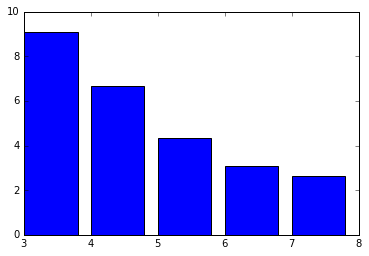

In [16]:
plt.bar(result.keys(),result.values())
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5, n_init=20, init = 'k-means++')
kmeans.fit(races2010)
label = kmeans.labels_

In [21]:
from collections import Counter
Counter(label)

Counter({0: 46, 1: 17, 2: 62, 3: 4, 4: 20})

0: Mostly White

1: Mostly Hispanic

2: Half is White, others are Asian and Hispanic

3: Mostly African American

4: Mostly Asian

In [35]:
race2010['race'] = label

In [37]:
race2010.to_csv('race2010.csv')